### 다중 회귀분석
* 아파트 가격 예측
<pre>
y = a*x + b*x**2 + c*x**3  -- 단순회귀분석
y = a1*x1 + a2*x2 + a3*x3 ... --다중 회귀분석
</pre>

In [1]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
X = Boston.data.iloc[:, :-1]
y = Boston.data.iloc[:, -1]

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
from sklearn.linear_model import LinearRegression
model_boston = LinearRegression()
model_boston.fit(x_train, y_train)

LinearRegression()

In [4]:
model_boston.score(x_train, y_train)

0.7610130166044289

In [5]:
model_boston.score(x_test, y_test)

0.6575986659564124

In [6]:
pred = model_boston.predict(x_test)

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.6575986659564124

In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred) # MSE
mse

32.37967477070963

In [9]:
import math
math.sqrt(mse) # RMSE

5.690314118808348

In [10]:
model_boston.coef_

array([-8.15515852e-02,  3.47007962e-02, -1.48996024e-02,  3.90439976e+00,
       -1.42396137e+01,  4.95066963e+00, -2.88980055e-02, -1.32509934e+00,
        2.01550997e-01, -1.16466543e-02, -8.71500322e-01,  6.73358309e-03,
       -3.29314319e-01])

In [11]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data

In [12]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
import statsmodels.formula.api as smf
formula = "medv~" + "+".join(boston_df.iloc[:,:-1].columns)
model_boston = smf.ols(formula=formula, data=boston_df).fit()
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 31 May 2024   Prob (F-statistic):          6.72e-135
Time:                        16:23:16   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model_boston.conf_int()

,0,1
Intercept,26.432226,46.486751
crim,-0.172584,-0.043438
zn,0.019449,0.073392
indus,-0.100268,0.141385
chas,0.993904,4.379563
nox,-25.271634,-10.261589
rm,2.988727,4.631004
age,-0.025262,0.026647
dis,-1.867455,-1.083679
rad,0.175692,0.436407


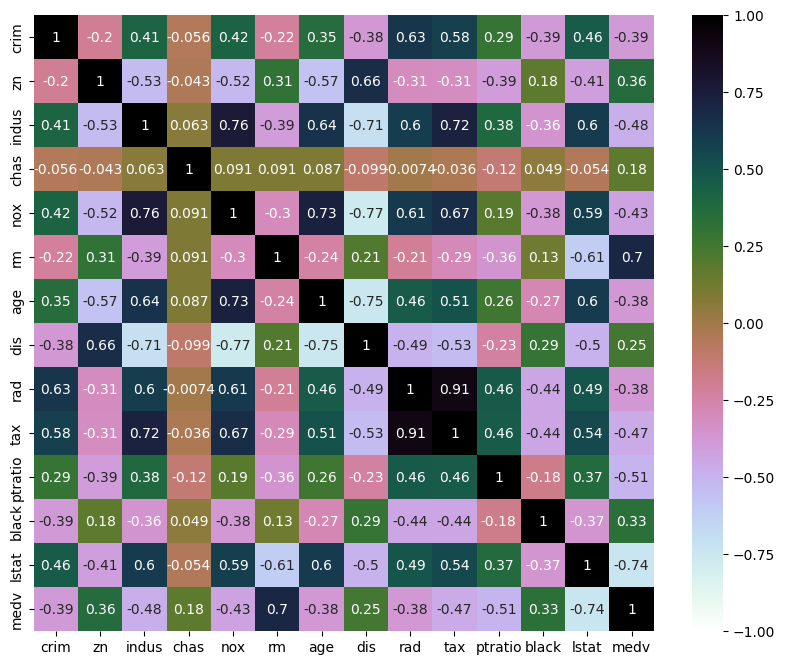

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(boston_df.corr(), vmin=-1, vmax=1, annot=True, cmap="cubehelix_r")
plt.show()

In [16]:
import statsmodels.formula.api as smf
formula = "medv ~ rm + lstat -1"
model_boston = smf.ols(formula=formula, data=boston_df).fit()
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Fri, 31 May 2024   Prob (F-statistic):                        0.00
Time:                        16:23:17   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             4.9069      0.070     69.906      0.000       4.769       5.045
lstat         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# x_train[:,[5, 12]]

In [18]:
from sklearn.linear_model import LinearRegression
model_boston = LinearRegression()
model_boston.fit(x_train.iloc[:,[5, 12]], y_train)

LinearRegression()

In [19]:
model_boston.score(x_train.iloc[:,[5, 12]], y_train)

0.6536821637458842

In [20]:
model_boston.score(x_test.iloc[:,[5, 12]], y_test)

0.596153752595066

In [21]:
import statsmodels.formula.api as smf
formula = "medv ~ rad + zn + rm + chas + age -1"
model_boston2 = smf.ols(formula=formula, data=boston_df).fit()

In [22]:
y_pred = model_boston2.predict(boston_df)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

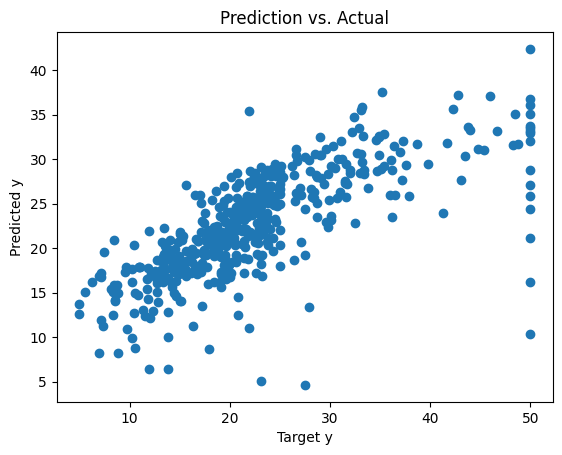

In [24]:
plt.scatter(boston_df.iloc[:,-1], y_pred)
plt.xlabel("Target y")
plt.ylabel("Predicted y")
plt.title("Prediction vs. Actual")
plt.show()

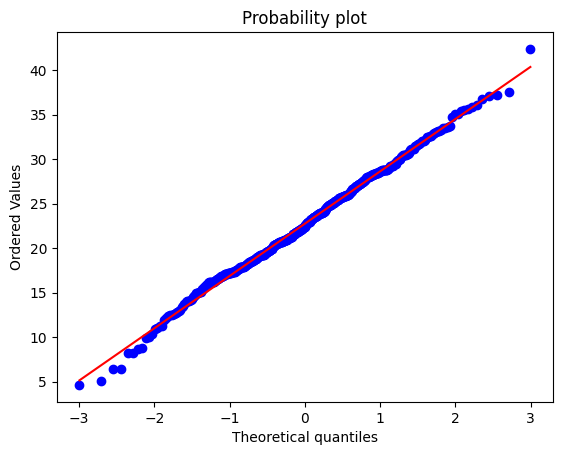

In [25]:
from scipy import stats
res = stats.probplot(y_pred, plot=plt)
plt.title("Probability plot")
plt.show()

In [26]:
influence = model_boston2.get_influence()
leverage = influence.hat_matrix_diag
leverage

array([0.00451776, 0.0056484 , 0.0071177 , 0.00849182, 0.00749566,
       0.00492324, 0.00257611, 0.00743155, 0.00978876, 0.00520168,
       0.00665308, 0.0046034 , 0.00344662, 0.00350544, 0.00503083,
       0.00348841, 0.00805384, 0.00464245, 0.00478533, 0.00339064,
       0.00834257, 0.0058364 , 0.00623029, 0.00851624, 0.00688384,
       0.00536983, 0.00614372, 0.00572945, 0.00660802, 0.00552768,
       0.0070933 , 0.00817743, 0.0046783 , 0.00733028, 0.00738016,
       0.00317729, 0.003061  , 0.00504048, 0.00794906, 0.01686875,
       0.01725022, 0.02286547, 0.01720944, 0.01750687, 0.00625739,
       0.00613695, 0.00660426, 0.00575776, 0.00848394, 0.00337546,
       0.00269591, 0.00309051, 0.00792315, 0.00609131, 0.02095916,
       0.02487653, 0.02391795, 0.03478123, 0.00530086, 0.00271819,
       0.00331751, 0.00850954, 0.00310248, 0.00424104, 0.00415371,
       0.01966903, 0.02126082, 0.00689605, 0.00311742, 0.00440053,
       0.01888701, 0.01182293, 0.01622191, 0.01801147, 0.01850

In [27]:
inf_df = influence.summary_frame()
inf_df.head()

,dfb_rad,dfb_zn,dfb_rm,dfb_chas,dfb_age,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.014158,-0.001691,-0.004468,0.004550,-0.005715,0.000086,-0.307386,0.004518,-0.020708,-0.307108,-0.020689
1,0.017086,0.006812,-0.005552,0.005430,-0.007745,0.000116,-0.320005,0.005648,-0.024118,-0.319718,-0.024097
2,-0.037099,-0.048103,0.060999,-0.014854,-0.024080,0.001287,0.947338,0.007118,0.080210,0.947241,0.080201
3,-0.015222,-0.045586,0.062027,-0.009620,-0.039300,0.000904,0.726654,0.008492,0.067248,0.726311,0.067216
4,-0.032230,-0.065823,0.086878,-0.016786,-0.047057,0.002031,1.159507,0.007496,0.100766,1.159907,0.100800


In [28]:
inf_df.sort_values(by="cooks_d", ascending=False).head(10) # 쿡의 거리가 큰 상위 10개 데이터

,dfb_rad,dfb_zn,dfb_rm,dfb_chas,dfb_age,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
372,0.353664,0.035681,-0.109444,0.789462,-0.039810,0.152533,4.596439,0.034841,0.873306,4.691842,0.891432
369,0.287072,0.008617,-0.068426,0.688935,-0.042178,0.116556,4.077971,0.033858,0.763401,4.143244,0.775620
370,0.267040,-0.009594,-0.038558,0.644822,-0.059787,0.102414,3.836245,0.033625,0.715591,3.889974,0.725613
368,0.368857,0.181923,-0.336413,-0.073225,0.265855,0.077543,6.233254,0.009880,0.622670,6.483507,0.647668
371,0.308803,0.047200,-0.126110,-0.069676,0.090929,0.043906,5.303207,0.007745,0.468540,5.453181,0.481790
162,-0.112920,-0.050371,0.020949,0.413657,0.043494,0.042798,2.591657,0.030876,0.462589,2.606601,0.465257
364,-0.173363,0.096816,-0.120227,-0.356978,0.170693,0.036421,-2.144531,0.038089,-0.426740,-2.152292,-0.428284
365,0.243968,0.138552,-0.234513,-0.029450,0.163341,0.030395,3.597183,0.011609,0.389841,3.640918,0.394581
163,-0.084396,-0.069066,0.060495,0.335488,-0.006600,0.028666,2.108330,0.031238,0.378592,2.115631,0.379903
204,0.014677,0.301759,-0.047322,-0.016860,0.024658,0.027384,2.206558,0.027352,0.370025,2.215145,0.371465


In [29]:
inf_df.sort_values(by="cooks_d", ascending=False).head(10).index

Int64Index([372, 369, 370, 368, 371, 162, 364, 365, 163, 204], dtype='int64')

In [30]:
inf_df.standard_resid # 표준화된 잔차

0     -0.307386
1     -0.320005
2      0.947338
3      0.726654
4      1.159507
         ...   
501   -0.477882
502   -0.315476
503   -0.254717
504   -0.439040
505   -1.562010
Name: standard_resid, Length: 506, dtype: float64

In [31]:
c, p = influence.cooks_distance  # Cook's distance, p-value

In [32]:
c, p

(array([8.57607218e-05, 1.16340057e-04, 1.28671302e-03, 9.04461053e-04,
        2.03074066e-03, 3.20792224e-04, 5.67084951e-06, 1.53316849e-03,
        8.06015504e-05, 7.99053018e-05, 1.50540054e-03, 9.30962551e-05,
        7.73122191e-05, 6.42436150e-05, 2.27397248e-04, 9.13111243e-05,
        1.20787174e-04, 2.72086373e-04, 7.62564440e-05, 1.01882798e-04,
        6.84812609e-04, 1.16522693e-05, 9.92016113e-04, 7.33173025e-04,
        5.60313227e-04, 6.32521615e-04, 2.43436937e-04, 9.70422809e-04,
        5.04452776e-04, 2.04206419e-04, 1.24736062e-03, 1.17782861e-03,
        1.30976990e-03, 1.07118836e-03, 1.66442093e-03, 1.07989001e-04,
        4.01384621e-05, 1.26142781e-04, 1.04717429e-09, 5.79819826e-05,
        5.12350479e-04, 2.35970568e-03, 6.15615562e-04, 1.06419494e-03,
        4.10539701e-04, 5.36667856e-04, 5.32494389e-04, 5.64456398e-04,
        3.53916958e-04, 3.70382167e-05, 2.45913006e-04, 1.24019449e-04,
        4.94540442e-04, 2.19501208e-04, 3.46156347e-03, 8.237432

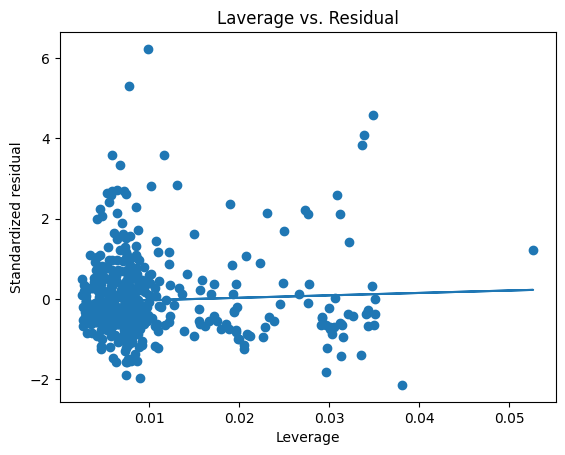

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = influence.hat_matrix_diag
y = inf_df.standard_resid
plt.scatter(x, y)
fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit)
plt.plot(x, fit_fn(x))
plt.xlabel("Leverage")
plt.ylabel("Standardized residual")
plt.title("Laverage vs. Residual")
plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [35]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data

In [36]:
formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns)

In [37]:
from patsy import dmatrices
y, X = dmatrices(formula, boston_df, return_type="dataframe")

In [38]:
import pandas as pd
df = pd.DataFrame()

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
X.shape[1] # 독립변수 X의 열의 수

14

In [41]:
df["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [42]:
df["features"] = X.columns

In [43]:
df

,vif,features
0,585.265238,Intercept
1,1.792192,crim
2,2.298758,zn
3,3.991596,indus
4,1.073995,chas
5,4.393720,nox
6,1.933744,rm
7,3.100826,age
8,3.955945,dis
9,7.484496,rad
